## BullDozer Pricing (Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [4]:
df.saledate.head()
#Type is object

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [5]:
df=pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [6]:
df.saledate.head()
#Type is DateTime 

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

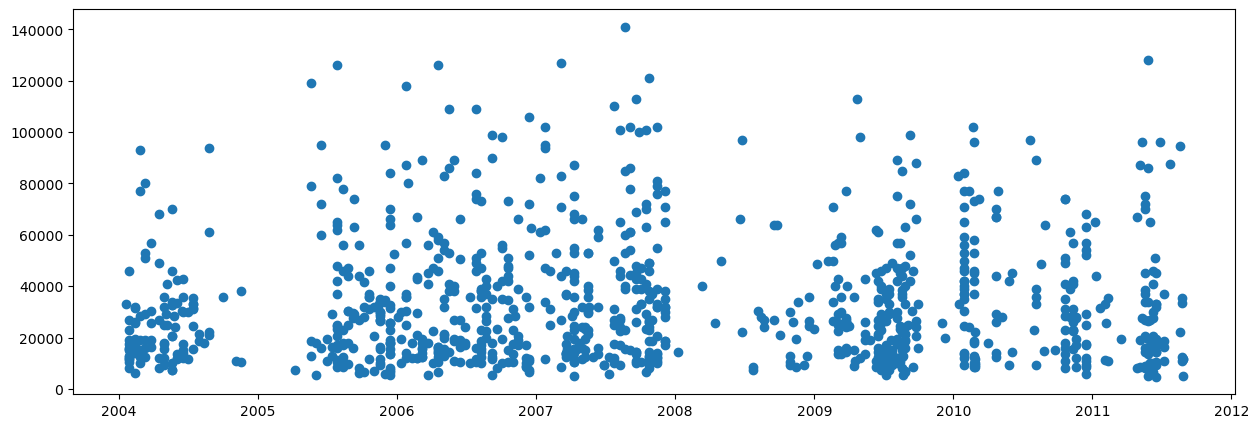

In [7]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

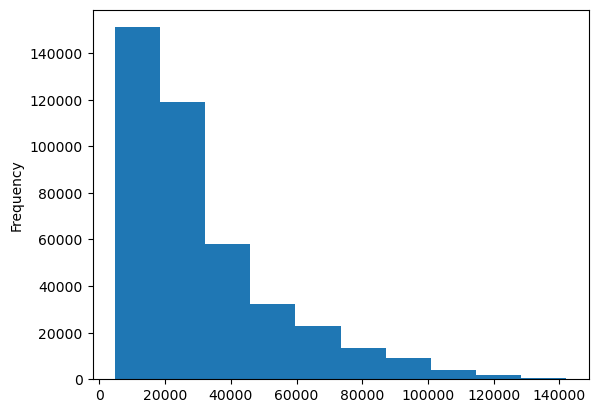

In [8]:
df.SalePrice.plot.hist();

In [9]:
df.sort_values(by=["saledate"],ascending=True,inplace=True)

In [10]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [11]:
df_temp=df.copy()

In [12]:
df_temp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [13]:
df_temp.info()
# to train a model on our data, all data must be numeric and non-null

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [14]:
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDayOfWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"]=df_temp.saledate.dt.dayofyear

In [15]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
df_temp.drop("saledate",axis=1,inplace=True)

In [17]:
df_temp.sample(20).T

,167349,382738,220009,62479,257630,11154,273854,299174,211362,13501,302060,185064,210914,372767,69166,212334,120614,45222,405222,382088
SalesID,1593335,4297084,1689214,1328705,1789171,1175709,1817560,2238679,1666850,1183538,2245570,1619861,1665655,2676481,1346314,1670709,1462898,1286700,4371349,4288689
SalePrice,12000.0,87500.0,85000.0,13000.0,6000.0,16500.0,9000.0,68500.0,7000.0,87000.0,12000.0,14250.0,12750.0,57500.0,9000.0,8500.0,57000.0,23500.0,8000.0,95000.0
MachineID,1313386,219423,1538042,1554726,1543961,1025304,1086641,500856,1236099,769863,366018,1128943,1550459,1140859,1222599,1480665,1409077,1205554,2298235,1405245
ModelID,4749,1269,11618,4089,9548,43,9862,1650,14756,3879,7009,4792,8585,15459,7013,8585,1681,3171,9566,1625
datasource,132,172,132,132,132,121,132,136,132,121,136,132,132,149,132,132,132,132,172,172
auctioneerID,9.0,1.0,1.0,1.0,19.0,3.0,1.0,2.0,1.0,3.0,1.0,99.0,24.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
YearMade,1000,2002,1999,1980,1982,1992,1000,1993,1995,2002,2002,1987,1984,2007,1984,1978,1988,1996,1996,2006
MachineHoursCurrentMeter,NaN,9245.0,NaN,NaN,NaN,5751.0,NaN,0.0,NaN,16610.0,0.0,NaN,NaN,1199.0,NaN,NaN,NaN,NaN,4359.0,4921.0
UsageBand,NaN,Medium,NaN,NaN,NaN,Medium,NaN,NaN,NaN,High,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN,Medium,Medium
fiModelDesc,644B,330CL,EX330LC5,D3B,743,416II,MS180,D7HIILGP,LX565,980G,226,710B,555,HL740TM7,235,555,E200BL,580L,873,D6NLGP


In [18]:
list(df_temp.items())

[('SalesID',
  205615    1646770
  274835    1821514
  141296    1505138
  212552    1671174
  62755     1329056
             ...   
  410879    6302984
  412476    6324811
  411927    6313029
  407124    6266251
  409203    6283635
  Name: SalesID, Length: 412698, dtype: int64),
 ('SalePrice',
  205615     9500.0
  274835    14000.0
  141296    50000.0
  212552    16000.0
  62755     22000.0
             ...   
  410879    16000.0
  412476     6000.0
  411927    16000.0
  407124    55000.0
  409203    34000.0
  Name: SalePrice, Length: 412698, dtype: float64),
 ('MachineID',
  205615    1126363
  274835    1194089
  141296    1473654
  212552    1327630
  62755     1336053
             ...   
  410879    1915521
  412476    1919104
  411927    1918416
  407124     509560
  409203    1869284
  Name: MachineID, Length: 412698, dtype: int64),
 ('ModelID',
  205615     8434
  274835    10150
  141296     4139
  212552     8591
  62755      4089
            ...  
  410879     5266
  412476

In [19]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [21]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [22]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [24]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [25]:
df_temp.to_csv("./data/train_tmp.csv",index=False)

In [26]:
df_temp1=pd.read_csv("./data/train_tmp.csv",low_memory=False)

In [27]:
df_temp1.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [28]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [29]:
df_temp1.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [30]:
for label,content in df_temp1.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_temp1[label].isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
for label,content in df_temp1.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_temp1[label].isna().sum():
            df_temp1[label].fillna(df_temp1[label].median(),inplace=True)

In [32]:
for label,content in df_temp1.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_temp1[label].isna().sum():
            df_temp1[label+"_is_missing"]=df_temp1[label].isna()

In [33]:
for label,content in df_temp1.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_temp1[label].isna().sum():
            print(label)

In [34]:
#df_temp1.head().T

In [35]:
df_temp1.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [36]:
pd.Categorical(df_temp1.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [37]:
for label,content in df_temp1.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp1[label]=pd.Categorical(df_temp1[label]).codes+1
# +1 because null values have a code of -1
#convert object->category->numeric

In [38]:
df_temp1.head().T

,0,1,2,3,4
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0.0,0.0,0.0,0.0,0.0
fiModelDesc,4593.0,1820.0,2348.0,1819.0,2119.0


In [77]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-null  i

In [39]:
df_temp1.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [40]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp1.drop("SalePrice",axis=1),df_temp1["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [41]:
model.score(df_temp1.drop("SalePrice",axis=1),df_temp1["SalePrice"])

0.9875600501830071

In [42]:
df_temp1.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [43]:
#Splitting data into train and valid split
df_valid=df_temp1[df_temp1.saleYear==2012]
df_train=df_temp1[df_temp1.saleYear!=2012]

In [44]:
len(df_valid),len(df_train)

(11573, 401125)

In [45]:
X_valid,y_valid=df_valid.drop("SalePrice",axis=1),df_valid["SalePrice"]
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]

In [46]:
X_valid.shape,y_valid.shape,X_train.shape,y_train.shape
#row*col

((11573, 56), (11573,), (401125, 56), (401125,))

In [47]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
model.score(X_valid,y_valid)

0.8724594330839462

## Evaluation Function
* Give evaluation metric is root mean squared log error(RMSLE)

In [49]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    score=np.sqrt(mean_squared_log_error(y_test,y_preds))
    return score
def get_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Train MAE":mean_absolute_error(y_train,train_preds),"Valid MAE":mean_absolute_error(y_valid,val_preds),
            "Train rmsle":rmsle(y_train,train_preds),"Valid rmsle":rmsle(y_valid,val_preds),"Train r2":r2_score(y_train,train_preds),"Valid r2":r2_score(y_valid,val_preds)}
    return scores

In [50]:
print(get_scores(model))

{'Train MAE': 1577.8071958367088, 'Valid MAE': 6124.061888015208, 'Train rmsle': 0.08421183621928564, 'Valid rmsle': 0.25552995825268193, 'Train r2': 0.9875159245575312, 'Valid r2': 0.8724594330839462}


## Testing the model on a subset of our data to improve speed

In [51]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
#By setting max samples to 10000, we reduce the number of samples that each estimator sees to 10000 instead of X_train.shape[0]=401125

In [52]:
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
get_scores(model)

{'Train MAE': 5560.373679675911,
 'Valid MAE': 7169.965538753997,
 'Train rmsle': 0.25774603737792534,
 'Valid rmsle': 0.29345355530882355,
 'Train r2': 0.8606923647396788,
 'Valid r2': 0.8322352976706756}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features":[0.5,1,"sqrt","auto"],
    "max_samples":[10000]
}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions=rf_grid,cv=5,n_iter=2,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


D:\ml\milestone_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\ml\milestone_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\ml\milestone_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [56]:
get_scores(rs_model)

{'Train MAE': 6787.79863117317,
 'Valid MAE': 8297.994223077736,
 'Train rmsle': 0.302087602188477,
 'Valid rmsle': 0.3290077315462033,
 'Train r2': 0.7983913106350389,
 'Valid r2': 0.7722922934697337}

## Ideal Model

In [57]:
ideal_model=RandomForestRegressor(
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    n_jobs=-1,
    max_samples=None,
    random_state=42
)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [58]:
get_scores(ideal_model)

{'Train MAE': 2946.637301402494,
 'Valid MAE': 5942.726635597567,
 'Train rmsle': 0.14427961447791623,
 'Valid rmsle': 0.24628662035502946,
 'Train r2': 0.9589787537858774,
 'Valid r2': 0.8818198991131088}

In [59]:
df_test=pd.read_csv("./data/bluebook-for-bulldozers/Test.csv",parse_dates=["saledate"],low_memory=False)

In [60]:
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [61]:
def process_data(df):
    df["saleYear"]=df.saledate.dt.year
    df["saleDay"]=df.saledate.dt.day
    df["saleMonth"]=df.saledate.dt.month
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfYear"]=df.saledate.dt.dayofyear
    df.drop("saledate",axis=1,inplace=True)
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if df[label].isna().sum():
                df[label].fillna(df[label].median(),inplace=True)
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=pd.Categorical(df[label]).codes+1
    

In [62]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [63]:
process_data(df_test)

In [64]:
df_test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [65]:
df_test.shape

(12457, 56)

In [66]:
X_train.shape

(401125, 56)

In [67]:
test_preds=ideal_model.predict(df_test)

In [68]:
final_preds=pd.DataFrame()
final_preds["SalesID"]=df_test.SalesID
final_preds["SalesPreds"]=test_preds

In [69]:
final_preds.head()

,SalesID,SalesPreds
0,1227829,17181.430666
1,1227844,18824.863025
2,1227847,50554.417838
3,1227848,71089.247723
4,1227863,52232.615335


In [70]:
final_preds.to_csv("./data/preds.csv")

In [71]:
len(ideal_model.feature_importances_),X_train.shape

(56, (401125, 56))

In [72]:
df_plot=pd.DataFrame({"Features":X_train.columns,"Feature Imp":ideal_model.feature_importances_})

In [73]:
df_plot.head()

,Features,Feature Imp
0,SalesID,0.032725
1,MachineID,0.017672
2,ModelID,0.047854
3,datasource,0.001991
4,auctioneerID,0.003344


In [74]:
df_plot.sort_values("Feature Imp",ascending=False,inplace=True)

In [75]:
df_plot.reset_index(drop=True)

,Features,Feature Imp
0,YearMade,0.203344
1,ProductSize,0.170374
2,saleYear,0.075201
3,fiSecondaryDesc,0.069486
4,fiBaseModel,0.052191
5,ModelID,0.047854
6,fiProductClassDesc,0.045216
7,Enclosure,0.042650
8,fiModelDesc,0.041784
9,fiModelDescriptor,0.034353


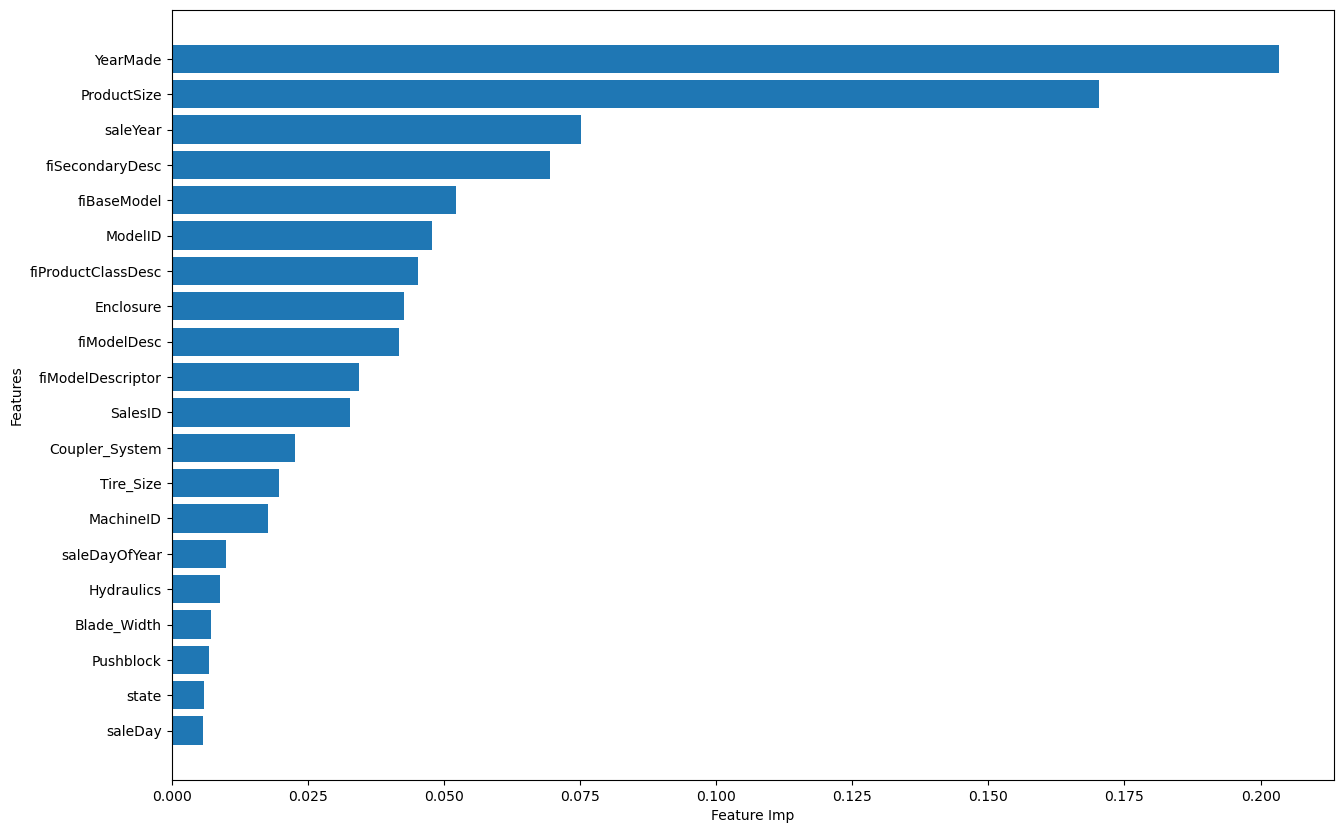

In [76]:
fig,ax=plt.subplots(figsize=(15,10))
ax.barh(df_plot["Features"][:20],df_plot["Feature Imp"][:20]);
ax.set(xlabel="Feature Imp",ylabel="Features");
ax.invert_yaxis();